In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import RMSprop

In [2]:
img = image.load_img("C:\\Users\\aiden\Downloads\\archive\\fresh_banana\\rotated_by_15_Screen Shot 2018-06-12 at 9.38.10 PM.png")

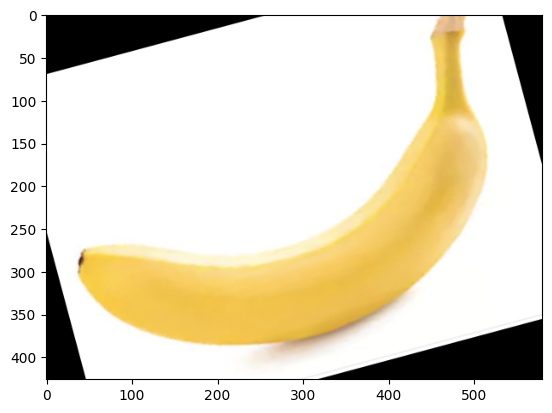

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("C:\\Users\\aiden\Downloads\\archive\\fresh_banana\\rotated_by_15_Screen Shot 2018-06-12 at 9.38.10 PM.png").shape

(426, 580, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory("C:\\Users\\aiden\\Downloads\\archive\\train\\",
                                            target_size=(200,200),
                                            batch_size=3,
                                            color_mode='rgb',
                                            class_mode='binary')

validation_dataset = train.flow_from_directory("C:\\Users\\aiden\\Downloads\\archive\\validate\\",
                                            target_size=(200,200),
                                            batch_size=3,
                                            class_mode='binary')

Found 2133 images belonging to 2 classes.
Found 609 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'fresh': 0, 'rotten': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])


In [10]:
model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=0.001),
                metrics=['accuracy'])

In [11]:
model_fit = model.fit(train_dataset,
                        epochs=15,
                        steps_per_epoch=50,
                        validation_data=validation_dataset)

Epoch 1/15
50/50 [==============================] - 18s 346ms/step - loss: 1.5408 - accuracy: 0.5467 - val_loss: 0.6080 - val_accuracy: 0.8128
Epoch 2/15
50/50 [==============================] - 16s 331ms/step - loss: 0.6122 - accuracy: 0.7267 - val_loss: 0.4843 - val_accuracy: 0.7471
Epoch 3/15
50/50 [==============================] - 16s 325ms/step - loss: 0.2921 - accuracy: 0.8867 - val_loss: 0.2213 - val_accuracy: 0.9080
Epoch 4/15
50/50 [==============================] - 16s 323ms/step - loss: 0.2482 - accuracy: 0.9067 - val_loss: 0.4735 - val_accuracy: 0.7455
Epoch 5/15
50/50 [==============================] - 16s 330ms/step - loss: 0.2260 - accuracy: 0.9400 - val_loss: 0.4436 - val_accuracy: 0.7455
Epoch 6/15
50/50 [==============================] - 16s 323ms/step - loss: 0.2228 - accuracy: 0.9667 - val_loss: 0.0561 - val_accuracy: 0.9754
Epoch 7/15
50/50 [==============================] - 17s 336ms/step - loss: 0.2756 - accuracy: 0.9667 - val_loss: 0.0682 - val_accuracy: 0.9737

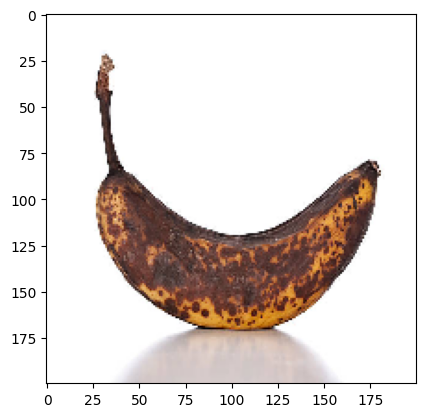

1/1 [==============================] - 0s 125ms/step
[[1.]]
Rotten Banana


In [12]:
# testImg = image.load_img("C:\\Users\\aiden\\Downloads\\archive\\fresh_banana\\rotated_by_15_Screen Shot 2018-06-12 at 9.38.10 PM.png", target_size=(200,200))
testImg = image.load_img("Rotten Banana.jpg", target_size=(200,200))
plt.imshow(testImg)
plt.show()

X = image.img_to_array(testImg)
X = np.expand_dims(X,axis=0)
images = np.vstack([X])

val = model.predict(images)

print(val)

if val == 0:
    print("Fresh Banana")
else:
    print("Rotten Banana")